In [2]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import pandas as pd
import threading 
import dtw
import datetime
import numpy as np
from time import sleep

def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    mid = 100
    # Set upper and lower limit to 2 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 2
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit:
            anomalies.append(outlier)
    return anomalies

def normalize(row):
    maxim = np.max(row)
    multi = 100/maxim
    return row.apply(lambda x: round(x*multi))

def normalize_rolling(row):
    return normalize(row.rolling(7, min_periods=1).mean())

%config Completer.use_jedi = False
pytrends = TrendReq(hl='en-US', tz=360)
pytrends = TrendReq()
#pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://188.166.249.209'], retries=2, backoff_factor=0.1, requests_args={'verify':False})

In [3]:
symptoms = []
with open('symptoms.txt', 'r') as filehandle:
    for line in filehandle:
        symptom = line[:-1]

        symptoms.append(symptom)

In [4]:
symptoms

['Abdominal obesity',
 'Abdominal pain',
 'Acne',
 'Actinic keratosis',
 'Acute bronchitis',
 'Adrenal crisis',
 'Ageusia',
 'Alcoholism',
 'Allergic conjunctivitis',
 'Allergy',
 'Amblyopia',
 'Amenorrhea',
 'Amnesia',
 'Anal fissure',
 'Anaphylaxis',
 'Anemia',
 'Angina pectoris',
 'Angioedema',
 'Angular cheilitis',
 'Anosmia',
 'Anxiety',
 'Aphasia',
 'Aphonia',
 'Apnea',
 'Arthralgia',
 'Arthritis',
 'Ascites',
 'Asperger syndrome',
 'Asphyxia',
 'Asthma',
 'Astigmatism',
 'Ataxia',
 'Atheroma',
 'Attention deficit hyperactivity disorder',
 'Auditory hallucination',
 'Autoimmune disease',
 'Avoidant personality disorder',
 'Back pain',
 'Bacterial vaginosis',
 'Balance disorder',
 "Beau's lines",
 "Bell's palsy",
 'Biliary colic',
 'Binge eating',
 'Bleeding',
 'Bleeding on probing',
 'Blepharospasm',
 'Bloating',
 'Blood in stool',
 'Blurred vision',
 'Blushing',
 'Boil',
 'Bone fracture',
 'Bone tumor',
 'Bowel obstruction',
 'Bradycardia',
 'Braxton Hicks contractions',
 'Break

In [298]:
pytrends.build_payload(['COVID', 'coronavirus'], cat=0, timeframe='2020-01-01 2020-12-07', geo='US', gprop='')
covid_trends = pytrends.interest_over_time()

In [314]:
covid_trends_truncated = covid_trends

In [317]:
covid_trends_truncated['week'] = pd.to_datetime(covid_trends.index).isocalendar().week 
covid_trends_truncated = covid_trends.set_index('week')
covid_trends_truncated = covid_trends_truncated[7:22]
covid_trends_truncated

,COVID,coronavirus,isPartial
week,,,
8,1,16,False
9,2,31,False
10,7,74,False
11,19,100,False
12,23,75,False
13,23,61,False
14,21,60,False
15,16,47,False
16,16,38,False


<AxesSubplot:xlabel='week'>

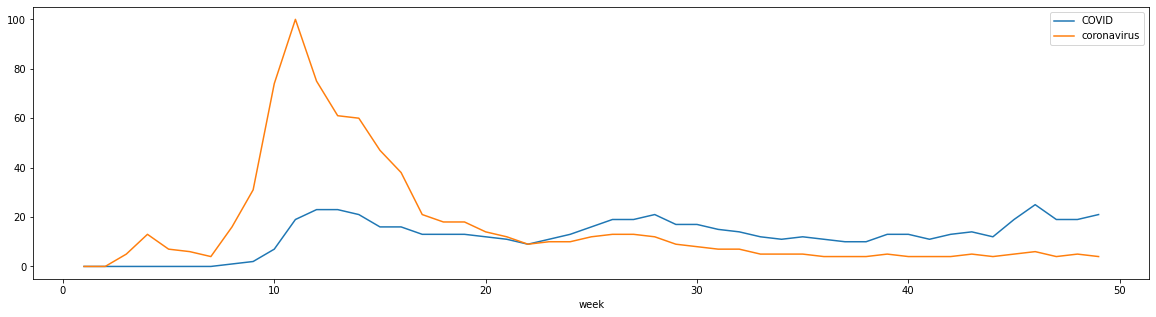

In [316]:
covid_trends_truncated.plot(figsize=(20,5))

In [4]:
timeframe_value='2020-01-01 2020-12-07'

In [5]:
symptom_trends = pd.DataFrame

In [263]:
symptom_trends = pd.read_csv('symptom_trends.csv', delimiter='\t' )
#symptom_trends.to_csv('symptom_trends.csv', sep='\t')

In [8]:
#need to make a couple of calls
for symptom in symptoms:
    pytrends.build_payload([symptom], cat=0, timeframe=timeframe_value, geo='US', gprop='')
    if  symptom_trends.empty:
        symptom_trends = pytrends.interest_over_time()
    else:
        symptom_trends[symptom] = pytrends.interest_over_time()[symptom].values        

In [264]:
symptom_trends['week'] = pd.to_datetime(symptom_trends['date']).dt.isocalendar().week
symptom_trends = symptom_trends.set_index('week')
symptom_trends = symptom_trends.drop('date', axis = 1).drop('isPartial', axis = 1)
symptom_trends

,Abdominal obesity,Abdominal pain,Acne,Actinic keratosis,Acute bronchitis,Adrenal crisis,Ageusia,Alcoholism,Allergic conjunctivitis,Allergy,...,Wart,Water retention,Weakness,Weight gain,Wheeze,Xeroderma,Xerostomia,Yawn,hyperhidrosis,pancreatiti
week,,,,,,,,,,,,,,,,,,,,,
1,0,84,88,59,97,29,22,80,33,72,...,74,70,88,87,37,30,82,78,16,0
2,75,84,89,69,79,65,14,79,44,70,...,68,73,84,89,66,51,88,63,16,0
3,39,93,90,100,66,39,0,97,52,71,...,72,63,77,91,48,38,86,83,19,0
4,0,89,81,77,94,37,0,87,59,68,...,67,58,67,88,79,81,100,83,15,0
5,51,94,84,70,100,28,7,86,40,70,...,69,65,72,87,59,37,62,73,19,0
6,51,93,84,81,91,57,7,88,50,72,...,67,81,68,85,49,74,66,87,18,91
7,25,88,91,70,66,46,0,100,36,72,...,75,76,71,87,58,51,76,93,16,0
8,0,99,87,89,65,36,7,92,39,75,...,71,77,71,89,65,43,77,97,20,0
9,0,89,89,72,78,100,14,86,52,81,...,77,62,67,88,67,50,87,74,20,0


In [265]:
symptom_trends_truncated = symptom_trends[7:22]

<AxesSubplot:xlabel='date'>

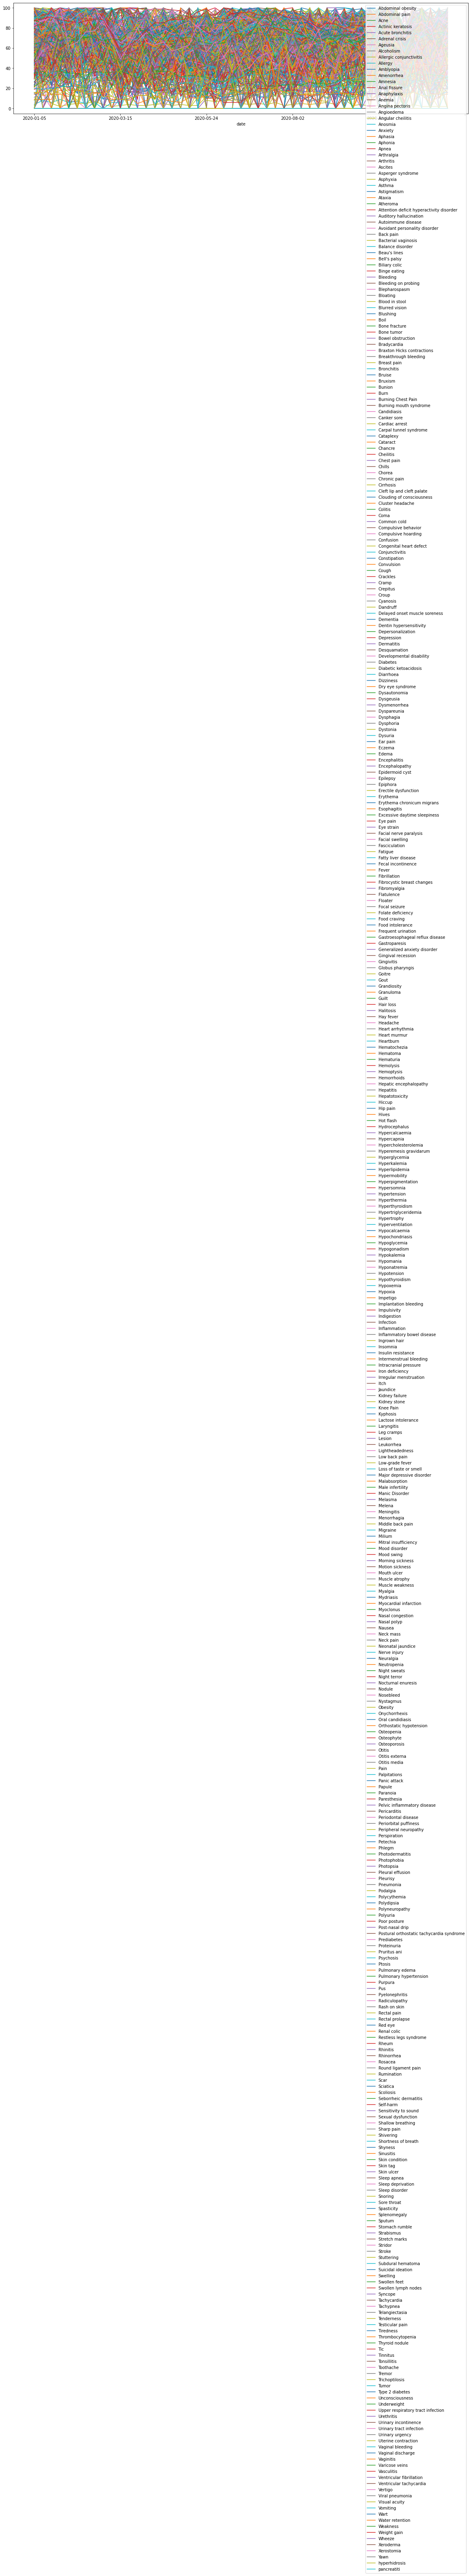

In [14]:
symptom_trends.plot(figsize=(20,5))

In [122]:
usa_cases_filename = "usa.csv";
usa_cases = pd.read_csv(usa_cases_filename, delimiter=';' )
usa_cases = usa_cases.set_index('Date')

usa_cases = usa_cases.groupby('Num of week').mean()
usa_cases['7-Day Moving Avg'] = normalize(usa_cases['7-Day Moving Avg'])
usa_cases

,New Cases,7-Day Moving Avg
Num of week,,
4,0.500000,0
5,0.857143,0
6,0.428571,0
7,0.285714,0
8,0.285714,0
9,1.571429,0
10,36.142857,0
11,294.285714,0
12,3194.000000,1


In [250]:
usa_cases_truncated = normalize(usa_cases['7-Day Moving Avg'][4:19])
usa_cases_truncated

Num of week
8       0
9       0
10      0
11      0
12      7
13     29
14     71
15    100
16    100
17     93
18     93
19     86
20     79
21     79
22     71
Name: 7-Day Moving Avg, dtype: int64

In [385]:
transposed = symptom_trends_truncated.transpose()
transposed

week,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Abdominal obesity,0,0,37,0,36,46,24,45,0,34,34,12,12,36,35
Abdominal pain,99,89,90,69,81,78,83,87,82,81,78,82,85,78,88
Acne,87,89,77,71,77,82,91,91,92,93,93,92,99,96,86
Actinic keratosis,89,72,73,67,48,68,60,46,51,46,61,52,44,67,66
Acute bronchitis,65,78,89,85,79,65,55,35,58,37,13,22,18,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xeroderma,43,50,28,62,14,33,62,32,26,52,78,100,40,42,47
Xerostomia,77,87,69,49,63,80,66,63,66,57,60,63,85,56,66
Yawn,97,74,80,76,77,91,89,100,92,98,90,100,90,84,73
hyperhidrosis,20,20,12,9,10,13,13,9,17,10,16,14,16,23,16


In [390]:
transposed = symptom_trends_truncated.transpose()
filtered = transposed.apply(lambda row: row if len(find_anomalies(row)) > 0 else row.apply(lambda x: None), axis = 1).dropna()
#filtered['anomalies'] = filtered.apply(lambda row: len(find_anomalies(row)), axis=1).transpose()
filtered = filtered.transpose()
filtered

,Abdominal pain,Actinic keratosis,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amnesia,Anal fissure,Anaphylaxis,Anemia,Angina pectoris,...,Vaginal discharge,Varicose veins,Vasculitis,Ventricular tachycardia,Vertigo,Viral pneumonia,Weakness,Xeroderma,hyperhidrosis,pancreatiti
week,,,,,,,,,,,,,,,,,,,,,
8,99.0,89.0,36.0,7.0,39.0,30.0,77.0,69.0,100.0,100.0,...,95.0,73.0,79.0,70.0,100.0,37.0,71.0,43.0,20.0,0.0
9,89.0,72.0,100.0,14.0,52.0,31.0,96.0,38.0,90.0,50.0,...,82.0,72.0,95.0,100.0,88.0,43.0,67.0,50.0,20.0,0.0
10,90.0,73.0,36.0,7.0,56.0,27.0,55.0,47.0,87.0,46.0,...,74.0,50.0,73.0,76.0,77.0,75.0,69.0,28.0,12.0,0.0
11,69.0,67.0,44.0,33.0,65.0,28.0,56.0,34.0,75.0,43.0,...,73.0,46.0,55.0,55.0,65.0,100.0,68.0,62.0,9.0,0.0
12,81.0,48.0,44.0,67.0,74.0,29.0,64.0,39.0,77.0,67.0,...,79.0,50.0,55.0,59.0,71.0,91.0,76.0,14.0,10.0,0.0
13,78.0,68.0,34.0,58.0,48.0,31.0,86.0,52.0,82.0,54.0,...,71.0,48.0,59.0,51.0,67.0,66.0,78.0,33.0,13.0,0.0
14,83.0,60.0,52.0,100.0,66.0,29.0,75.0,42.0,75.0,64.0,...,80.0,60.0,68.0,41.0,75.0,44.0,77.0,62.0,13.0,0.0
15,87.0,46.0,33.0,31.0,51.0,30.0,70.0,39.0,72.0,45.0,...,83.0,50.0,51.0,56.0,79.0,32.0,69.0,32.0,9.0,0.0
16,82.0,51.0,49.0,31.0,16.0,34.0,70.0,47.0,72.0,61.0,...,82.0,57.0,59.0,65.0,79.0,28.0,69.0,26.0,17.0,0.0


In [391]:
filtered['Ageusia'].transpose().corr(covid_trends_truncated['COVID'].transpose())

0.6846200036582107

In [392]:
transposed = filtered.transpose()

transposed['coeff'] = normalize(transposed.apply(lambda row: row.corr(covid_trends_truncated['COVID']), axis=1))

In [400]:
filtered.transpose()['Cough']

week
8         54.0
9         60.0
10        80.0
11       100.0
12        85.0
13        65.0
14        55.0
15        35.0
16        33.0
17        29.0
18        25.0
19        25.0
20        23.0
21        21.0
22        19.0
coeff     31.0
Name: Cough, dtype: float64

In [402]:
filtered = transposed.sort_values('coeff').iloc[::-1]
filtered.head(5)

week,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,coeff
Headache,65.0,70.0,74.0,88.0,100.0,95.0,88.0,75.0,76.0,72.0,68.0,67.0,69.0,67.0,60.0,100
Low-grade fever,0.0,16.0,38.0,100.0,59.0,86.0,66.0,56.0,21.0,35.0,21.0,15.0,15.0,8.0,7.0,94
Shortness of breath,24.0,31.0,60.0,100.0,93.0,78.0,63.0,45.0,41.0,36.0,32.0,30.0,32.0,29.0,26.0,89
Ageusia,7.0,14.0,7.0,33.0,67.0,58.0,100.0,31.0,31.0,70.0,63.0,71.0,20.0,13.0,20.0,85
Anosmia,12.0,10.0,8.0,9.0,100.0,51.0,37.0,25.0,18.0,20.0,13.0,10.0,23.0,10.0,12.0,81


<AxesSubplot:xlabel='week'>

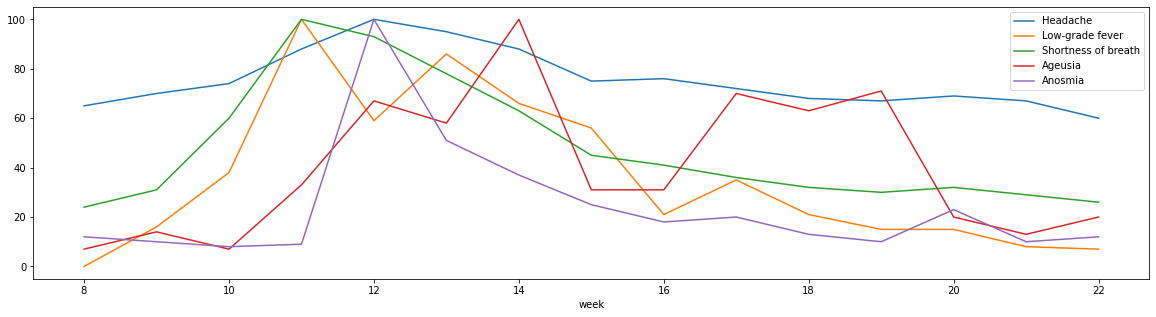

In [404]:
filtered.head(5).transpose().drop('coeff').plot(figsize=(20,5))